# Lab05: Cleaning Data
#Fill in the blanks with the instruction code for a fulfilled program.

### Import Python Package
* NumPy and Pandas
* import matplotlib.pyplot as plt and %matplotlib inline
* import seaborn as sns

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd




### Input Dataset
* read csv "customers.csv"
* show first 5 rows

In [13]:
##Loading data to data frame
dfCtm = pd.read_csv('customers.csv')
df = dfCtm.set_index('customer_id')
df.head(5)



,age,gender,region,income,married,children,car,response
customer_id,,,,,,,,
ID12101,48.0,F,NaN,17546.0,NO,1.0,NO,NO
ID12102,40.0,MALE,TOWN,30085.1,YES,NaN,YES,NO
ID12103,51.0,WOMEN,INNER_CITY,16575.4,YES,0.0,YES,YES
ID12104,23.0,FEMALE,TOWN,20375.4,YES,3.0,NO,NO
ID12104,23.0,FEMALE,TOWN,20375.4,YES,3.0,NO,NO


### Step1: Understand dataset

In [14]:
# check out the dimension of the dataset
df.shape



(300, 8)

In [15]:
# read the first 7 rows
df.head(7)



,age,gender,region,income,married,children,car,response
customer_id,,,,,,,,
ID12101,48.0,F,NaN,17546.0,NO,1.0,NO,NO
ID12102,40.0,MALE,TOWN,30085.1,YES,NaN,YES,NO
ID12103,51.0,WOMEN,INNER_CITY,16575.4,YES,0.0,YES,YES
ID12104,23.0,FEMALE,TOWN,20375.4,YES,3.0,NO,NO
ID12104,23.0,FEMALE,TOWN,20375.4,YES,3.0,NO,NO
ID12105,NaN,MALE,RURAL,50576.3,YES,0.0,NO,YES
ID12106,57.0,WOMEN,TOWN,37869.6,YES,2.0,NO,YES


In [16]:
# read the last 7 rows
df.tail(7)


,age,gender,region,income,married,children,car,response
customer_id,,,,,,,,
ID12393,51.0,MALE,RURAL,46323.80,YES,2.0,YES,YES
ID12394,26.0,FEMALE,TOWN,20950.70,YES,0.0,NO,YES
ID12395,42.0,MALE,TOWN,22495.70,YES,0.0,NO,YES
ID12396,34.0,MALE,TOWN,32548.90,YES,0.0,YES,YES
ID12397,54.0,FEMALE,RURAL,24583.40,NO,2.0,YES,YES
ID12398,18.0,MALE,RURAL,8639.24,YES,2.0,NO,NO
ID12399,47.0,WOMEN,INNER_CITY,17139.50,NO,2.0,YES,NO


In [17]:
# return an arry of column names
df.columns.values


array(['age', 'gender', 'region', 'income', 'married', 'children', 'car',
       'response'], dtype=object)

In [18]:
# return a list of column names
df.columns.tolist()


['age', 'gender', 'region', 'income', 'married', 'children', 'car', 'response']

### Step2: Check missing value
* df.isnull() # checking missing values
* df.isnull().sum() # check missing by variable
* df.isnull().sum().sum() # check how many missing values in data
* df.nunique() function represents the unique values present in each column of the dataframe
* df.-columnName.unique() function represents the unique values present in each column of the dataframe

In [19]:
# checking missing values, then show first 5 rows
df.isnull()



,age,gender,region,income,married,children,car,response
customer_id,,,,,,,,
ID12101,False,False,True,False,False,False,False,False
ID12102,False,False,False,False,False,True,False,False
ID12103,False,False,False,False,False,False,False,False
ID12104,False,False,False,False,False,False,False,False
ID12104,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
ID12395,False,False,False,False,False,False,False,False
ID12396,False,False,False,False,False,False,False,False
ID12397,False,False,False,False,False,False,False,False


In [20]:
# check missing by summation variable
df.isnull().sum()




age         7
gender      0
region      6
income      0
married     0
children    6
car         0
response    0
dtype: int64

In [22]:
# check how many missing values in data
df.isnull().sum().sum()



19

In [24]:
# check unique values present in each column of the dataframe
df.nunique()



age          56
gender        6
region        4
income      299
married       2
children      4
car           2
response      2
dtype: int64

In [26]:
# check  unique values present in "gender" column of the dataframe
df.gender.unique()



array(['F', 'MALE', 'WOMEN', 'FEMALE', 'MAN', 'M'], dtype=object)

### Step 3: Remove the NaN values using dropna() method
* dataframe.dropna(axis, how, thresh, subset, inplace)

In [32]:
## check isnull() each column
dfCtm = df.dropna()
dfCtm.isnull().sum()

age         0
gender      0
region      0
income      0
married     0
children    0
car         0
response    0
dtype: int64

In [31]:
# Remove NaN in datafram value on "age" and "region" column ... ,inplace=True
dfCtm = df.dropna(subset=["age","region"])
dfCtm.isnull().sum()



age         0
gender      0
region      0
income      0
married     0
children    6
car         0
response    0
dtype: int64

In [33]:
# Check NaN value 
df.isnull().sum()

age         7
gender      0
region      6
income      0
married     0
children    6
car         0
response    0
dtype: int64

In [34]:
# Drop the rows(axis=0) where at least one element is missing.
dfCtm = df.dropna(axis=0)
dfCtm.isnull().sum()



age         0
gender      0
region      0
income      0
married     0
children    0
car         0
response    0
dtype: int64

In [17]:
# Check NaN value 
df.isnull().sum()

customer_id    0
age            0
gender         0
region         0
income         0
married        0
children       0
car            0
response       0
dtype: int64

### Step 4: Fill in NaN missing values
#### Loading data in "df" Data frame again
* DataFrame.fillna(value, axis, inplace)
* DataFrame.Column_Name.fillna(value, axis, inplace)

In [35]:
# Load dataset again for practice fill value in Null values
df = pd.read_csv('customers.csv')
# Check NaN value 
df.isnull().sum()

customer_id    0
age            7
gender         0
region         6
income         0
married        0
children       6
car            0
response       0
dtype: int64

In [36]:
df.head(5)

,customer_id,age,gender,region,income,married,children,car,response
0,ID12101,48.0,F,NaN,17546.0,NO,1.0,NO,NO
1,ID12102,40.0,MALE,TOWN,30085.1,YES,NaN,YES,NO
2,ID12103,51.0,WOMEN,INNER_CITY,16575.4,YES,0.0,YES,YES
3,ID12104,23.0,FEMALE,TOWN,20375.4,YES,3.0,NO,NO
4,ID12104,23.0,FEMALE,TOWN,20375.4,YES,3.0,NO,NO


* **fill in missing value with  50  and save the data to column age**
* **datafram.column_name.fillna(50,inplace=True)**

In [37]:
# fill in missing with singular column
dfCtm.age.fillna(50,inplace=True)



* **fill in missing with a string : "TOWN" and save the data to column region**
* **datafram.column_name.fillna('TOWN',inplace=True)**

In [38]:
# fill in missing with a string : "TOWN" and save the data to column region
dfCtm.region.fillna("TOWN",inplace=True)


* **fill in missing with values with sample median() in column "children"**
* **datafram.column_name.fillna(df.children.median(),inplace=True)**

In [39]:
# fill in missing with values with sample median() in column "children"
dfCtm.children.fillna(df.children.median(),inplace=True)


In [23]:
# Check NaN value 
df.isnull().sum()

customer_id    0
age            0
gender         0
region         0
income         0
married        0
children       0
car            0
response       0
dtype: int64

### Step 5.1 Check Duplicate Value in Column "customer_id"
* **DataFrame.Column_Name.duplicated().sum()**

In [44]:
#Handle Duplicate Value in "customer_id" Column
df.customer_id.duplicated().sum()


1

### Step 5.2: Remove Duplicate Value in Column "customer_id"
* **DataFrame.drop_duplicats(subset =' ', inplace = True)**

In [51]:
#Remove Duplicate Value in Column
df.drop_duplicates(subset ='customer_id', inplace = True)
dfCtm.head(6)

,age,gender,region,income,married,children,car,response
customer_id,,,,,,,,
ID12103,51.0,WOMEN,INNER_CITY,16575.40,YES,0.0,YES,YES
ID12104,23.0,FEMALE,TOWN,20375.40,YES,3.0,NO,NO
ID12104,23.0,FEMALE,TOWN,20375.40,YES,3.0,NO,NO
ID12106,57.0,WOMEN,TOWN,37869.60,YES,2.0,NO,YES
ID12107,22.0,MALE,RURAL,8877.07,NO,0.0,NO,NO
ID12108,58.0,MALE,TOWN,24946.60,YES,0.0,YES,YES


In [52]:
#Check duplicate rows
df.customer_id.duplicated().sum()

0

### Exploration Data Analysis Technique

### Count Plot :: Seaborn
* **sns.countplot(df[column_name])**
* **using column name is "gender"**

C:\Users\Mark\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

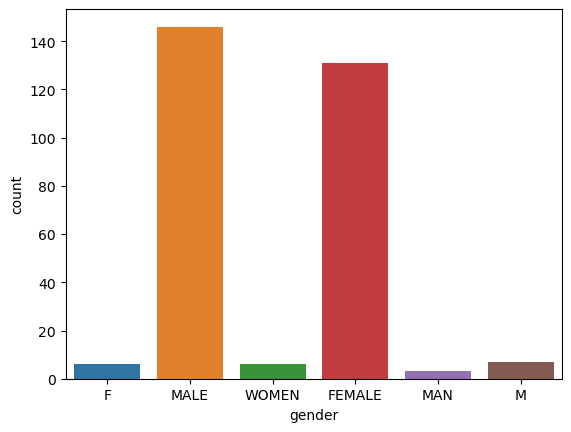

In [53]:
#Create seaborn graph of countplot in colunm ""gender
sns.countplot(df['gender'])



### Replace value 
* **DataFrame.replace(value, inplace = True)**
* **Create Function replaceValueGender() to replace follow value as below**
** replace F AND WOMEN to FEMALE
** replace M AND MAN to MALE

In [62]:
# Create function replaceValueGender():
def replaceValueGender():
    df.replace('MALE','M',inplace = True)
    df.replace('FEMALE','F',inplace = True)
    df.replace('WOMEN','F',inplace = True)
    df.replace('MAN','M',inplace = True)

replaceValueGender()
df.head(7)


,customer_id,age,gender,region,income,married,children,car,response
0,ID12101,48.0,F,NaN,17546.00,NO,1.0,NO,NO
1,ID12102,40.0,M,TOWN,30085.10,YES,NaN,YES,NO
2,ID12103,51.0,F,INNER_CITY,16575.40,YES,0.0,YES,YES
3,ID12104,23.0,F,TOWN,20375.40,YES,3.0,NO,NO
5,ID12105,NaN,M,RURAL,50576.30,YES,0.0,NO,YES
6,ID12106,57.0,F,TOWN,37869.60,YES,2.0,NO,YES
7,ID12107,22.0,M,RURAL,8877.07,NO,0.0,NO,NO


In [63]:
# Calling function replaceValueGender()
replaceValueGender()

C:\Users\Mark\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

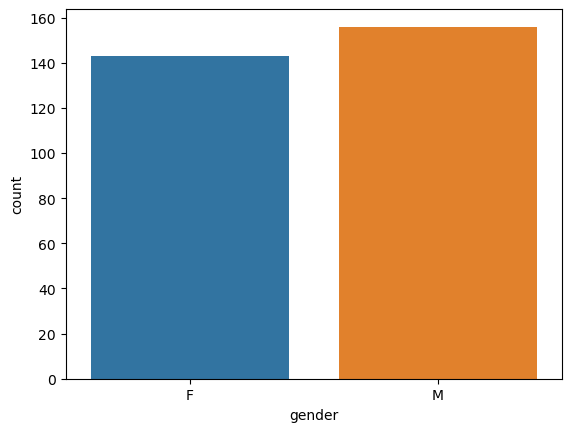

In [64]:
#Show countplot again
sns.countplot(df['gender'])




### Box Plot :: Matplotlib
* **data_frame.boxplot(column ='column_name')**
* **using column name is "age"**

<AxesSubplot:>

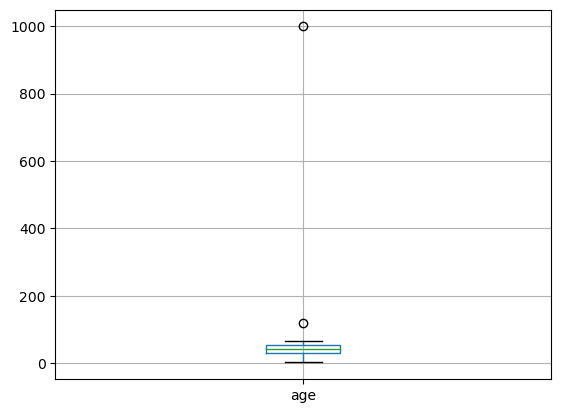

In [65]:
## Create boxplot graph
df.boxplot(column ='age')

### Drop value 
* **DataFrame.drop(index, inplace = True)**
** Index is df.index[df['age'] >= 80]

In [2]:
# Drop value in finding index :  df.index[df['age'] >= 80]
df.drop(df.index[df['age'] >= 80], inplace = True)



NameError: name 'df' is not defined

<AxesSubplot:>

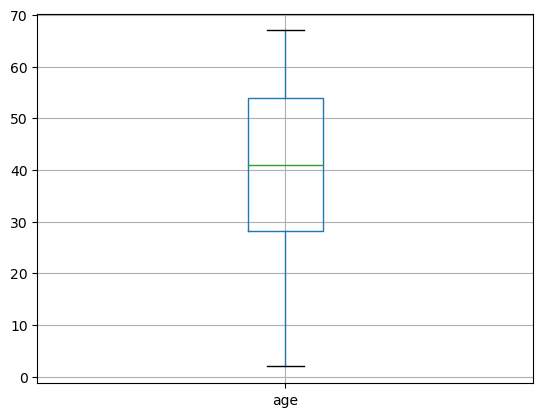

In [67]:
# Create boxplot graph of colunm age again
df.boxplot(column ='age')